# MANUAL DE LABORATORIO DE COMUNICACIONES DIGITALES: PYTHON
F. Javier Payán Somet, Juan José Murillo-Fuentes, José Carlos Aradillas Jaramillo \
_Departamento de Teoría de la Señal y Comunicaciones_ \
_Escuela Técnica Superior de Ingeniería_ \
_Universidad de Sevilla_ 

# Tema 4. Modulador Lineal I

**Este notebook contiene código del Tema 4**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gapsc-us/labcomdig/blob/main/Tema4.Transmisor_Lineal_I.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Inicialización

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Numpy ≥1.16 is required
import numpy as np
assert np.__version__ >= "1.16"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore") #Ignorar warnings

## Diseño experimental de un transmisor PAM

### Transmisor PAM discreto

**Código 4.1** Transmisor M-PAM

Las funciones que se describen aquí están en el fichero labcomdig.py

In [2]:
def transmisorpam(Bn,Eb,M,p,L):
    '''
    [Xn,Bn,An,phi,alfabetopam] = transmisorpam(Bn,M,Eb,p,L)
     
    Bn = Secuencia de dígitos binarios
    Eb = Energía media por bit transmitida en Julios
    M  = Número de símbolos del código PAM
    p  = Pulso paso de baja o paso de banda 
    L  = Número de puntos a utilizar en la representación de un sí­mbolo
    
    Devuelve:
    Xn = la señal de información (discreta)
    Bn = La secuencia de dígitos binarios realmente transmitidos
    An = La secuencia de niveles de amplitud transmitidos
    phi = Pulso básico real normalizado (energía unidad)
    alfabetopam = Los niveles de amplitud asociados a cada símbolo
    '''    
    
    # Se obtienen en primer lugar los niveles asociado a cada símbolo ¿Cuántos bits hay en cada sí­mbolo?

    k = int(np.ceil(np.log2(M)))
    
    # Se Ajusta M a una potencia de dos
    M = 2**(k)
    
    # El alfabeto [Ver la ecuación (4.21)] 
    alfabetopam = np.sqrt(3*Eb*np.log2(M)/(M**2-1))*(2*(np.arange(M))-M+1)
    
    # Si Bn no tiene una longitud múltiplo de k, se completa con ceros
    Nb = len(Bn)  # Número de bits a transmitir, actualizado
    Bn = np.pad(Bn, [0, int(k*np.ceil(Nb/k)-Nb)],mode='constant')
    Nb = len(Bn)  # Número de bits a transmitir tras la corrección
    Ns = Nb//k        # Número de símbolos a transmitir
    
    # La secuencia generada
    if M>2:
        An = alfabetopam[gray2de(np.reshape(Bn,[Ns,k]))]
    else:
        An = alfabetopam[Bn]
    
    # Comprobación de las longitudes y otros datos del pulso suministrado para 
    # hacer que el número de muestras del mismo sea efectivamente L
    Ls = len(p)
    if Ls<L:
        p = np.pad(p,[0,L-Ls],mode='constant')
    else:
        print('La duración del pulso se trunca a {} muestras'.format(str(L)))
        p = p[:L] #Debe modificarse si se quiere un pulso de más de L muestras
    
    # Se normaliza la energía del pulso para obtener la base del sistema
    phi = (1/np.sqrt(np.dot(p, p.T)))*p 
       
    # Obtención del tren de pulsos
    Xn = np.kron(An,phi) #Debe modificarse si se quiere un pulso de más de L muestras
    
    return [Xn,Bn,An,phi,alfabetopam]

**Código 4.2** Asignación Gray a decimal

In [3]:
def gray2de(b): 
    ''' 
     d = gray2de(b) Convierte cada fila de la matriz formada por dígitos binarios b
       en un vector columna, d, de los valores decimales correspondientes.
    '''
    c = np.zeros_like(b)
    c[:,0] = b[:,0]
    for i in range(1,np.shape(b)[1]):
        c[:,i] = np.logical_xor(c[:,i-1], b[:,i])
    # Convierte los bits menos significativos en los más significativos
    c = np.fliplr(c)

    #Comprueba un caso especial.
    [n,m] = np.shape(c) 
    if np.min([m,n]) < 1:
        d = []
        return
    d = np.dot(c, 2**np.arange(m))
    return d

**Código 4.3** Ejemplos de uso de Gray2de

In [4]:
b =np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]).T
print('Asignación de Gray de números de 0 a 7 codificados en 3 bits de forma consecutiva:\n',gray2de(b))

b =np.array([[0,0,0],[0,0,1],[0,1,1],[0,1,0],[1,1,0],[1,1,1],[1,0,1],[1,0,0]]).T
print('Asignación de Gray de secuencia con números de 0 a 7 ordenados de forma que haya cambios consecutivos de un bit:\n',gray2de(b))

Asignación de Gray de números de 0 a 7 codificados en 3 bits de forma consecutiva:
 [ 10  34 102]
Asignación de Gray de secuencia con números de 0 a 7 ordenados de forma que haya cambios consecutivos de un bit:
 [10 40 68]


**Código 4.4** Ejemplos de uso de np.reshape

In [5]:
a=np.array([[4, 1, 1, 4, 2, 2],[ 2, 2, 4, 2, 3, 2]])
print('Sea el vector fila de 12 elementos\n',a)
A=np.reshape(a,newshape=[4,3])
print('Vector a reordenado como Matriz 4x3\n',A)
B=np.reshape(a,newshape=[4,3], order='F') #F after Fortran-like
print('Vector a reordenado como Matriz 4x3 por columna\n',B)
C=np.reshape(a,newshape=[3,4]) 
print('Vector a como Matriz 3x4\n',C)
D=np.reshape(a,newshape=[3,4], order='F')
print('Vector a reordenado como Matriz 3x4 por columna\n',D)

Sea el vector fila de 12 elementos
 [[4 1 1 4 2 2]
 [2 2 4 2 3 2]]
Vector a reordenado como Matriz 4x3
 [[4 1 1]
 [4 2 2]
 [2 2 4]
 [2 3 2]]
Vector a reordenado como Matriz 4x3 por columna
 [[4 1 2]
 [2 4 3]
 [1 4 2]
 [2 2 2]]
Vector a como Matriz 3x4
 [[4 1 1 4]
 [2 2 2 2]
 [4 2 3 2]]
Vector a reordenado como Matriz 3x4 por columna
 [[4 2 4 3]
 [2 1 2 2]
 [1 4 2 2]]


### Ejemplos de uso de la función transmisorpam

**Código 4.5** Generación de una señal M-PAM banda base con una señalización Manchester



Generación de una señal M-PAM banda base con una señalización Manchester.
La duración del pulso se trunca a 8 muestras


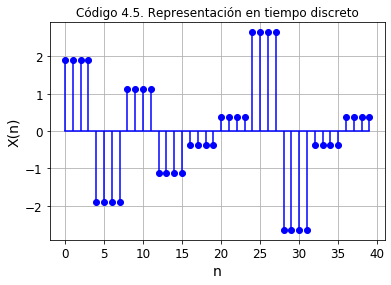

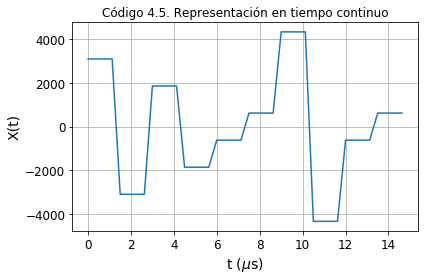

In [6]:
print('\n\nGeneración de una señal M-PAM banda base con una señalización Manchester.')
#import matplotlib.pyplot as plt
#import numpy as np
#from labcomdig import transmisorpam

# Datos
Bn = np.array([1,0,1,1,1,1,0,1,0,1,0,0,0,1,0]) #Secuencia de bits
Eb = 8 #Energía de bit, en Julios
L = 8 #Número de muestras por símbolo
Rb = 1e6 #Sólo necesario para representar en tiempo
M = 8 #Orden de la modulación

# Definición del pulso de Manchester
p = np.ones(L) # La función evaluada en los puntos elegidos 
p[L//2:] = -1 # // se usa para división entera (floor)
[Xn,Bn,An,phi,alfabeto] = transmisorpam(Bn,Eb,M,p,L)

#Actualizamos valores tras las posibles modificaciones
L = len(phi) #Número de muestras por símbolo
Nb = len(Bn) #Número de bits transmitidos
M = len(alfabeto) #Número de símbolos de la constelación
k = np.log2(M) # Número de bits por símbolo
Ns = Nb/k #Número de símbolos

# Representación en tiempo discreto
plt.figure(41)
plt.stem(np.arange(Ns*L),Xn, 'b-','bo','b-', use_line_collection = True)
plt.grid()
plt.xlabel('n'); plt.ylabel('X(n)')
plt.title('Código 4.5. Representación en tiempo discreto')
plt.show()

# Representación en tiempo continuo
Tb = 1/Rb #Duración del bit en segundos
Ts = Tb*k #Duración tiempo de símbolo
Tm = Ts/L #Intervalo entre cada muestra de la señal 
Td = Tb*Nb #Duración total de la señal
t = np.arange(Ns*L)*Tm*1e6 #Otra posibilidad: t = np.arange(0,Td,Tm)*1e6
#t es el eje de representación de la señal en tiempo continuo escalado (1e6)
Xt = np.sqrt (1/Tm )*Xn
plt.figure(42), plt.plot(t,Xt), plt.grid()
plt.xlabel('t ($\mu$s)'), plt.ylabel('X(t)')
plt.title('Código 4.5. Representación en tiempo continuo')
plt.tight_layout()
plt.show()


**Código 4.6** Generación de una señal M-PAM paso de banda



Generación de una señal M-PAM paso de banda con pulso rectangular.
Incrementamos de 8 a 32 el número de muestras

Definimos el pulso p como el producto de un pulso conformador,
 rectangular, multiplicado por un coseno de frecuencia angular wc=4pi/T
La duración del pulso se trunca a 32 muestras


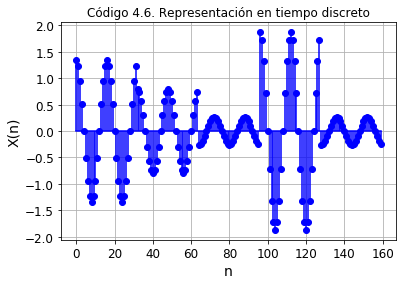

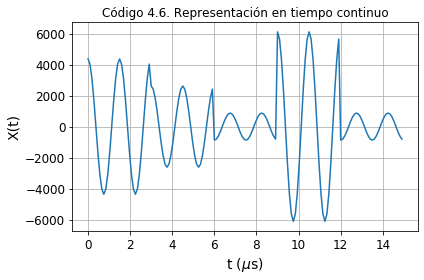

In [8]:
print('\n\nGeneración de una señal M-PAM paso de banda con pulso rectangular.')
#import numpy as np
#import matplotlib.pyplot as plt
#from labcomdig import transmisorpam

# Datos
Bn = np.array([1,0,1,1,1,1,0,1,0,1,0,0,0,1,0]) #Secuencia de bits
Eb = 8 #Energía de bit, en Julios
print('Incrementamos de 8 a 32 el número de muestras\n')
L = 32 #Número de muestras por símbolo, se incrementa de 8 a 32
Rb = 1e6 #Sólo necesario para representar en tiempo
M = 8 #Orden de la modulación

print('Definimos el pulso p como el producto de un pulso conformador,\n \
rectangular, multiplicado por un coseno de frecuencia angular wc=4pi/T')

# Definición del pulso conformador g: rectangular
g = np.ones(L) # 

#Definición de pulso p
wc = 4*np.pi/L #frecuencia angular en discreto
p = np.sqrt(2/L)*g*np.cos(wc*np.arange(L))

# Transmision
[Xn,Bn,An,phi,alfabeto] = transmisorpam(Bn,Eb,M,p,L)

#Actualizamos valores tras las posibles modificaciones
L = len(phi) #Número de muestras por símbolo
Nb = len(Bn) #Número de bits transmitidos
M = len(alfabeto) #Número de símbolos de la constelación
k = np.log2(M) # Número de bits por símbolo
Ns = Nb/k #Número de símbolos

# Representación en tiempo discreto
plt.figure(43)
plt.stem(np.arange(Ns*L),Xn,'b-','bo','b-', use_line_collection = True)
plt.grid()
plt.xlabel('n'), plt.ylabel('X(n)')
plt.title('Código 4.6. Representación en tiempo discreto')
plt.show()

# Se definen los parámetros en tiempo continuo
Tb = 1/Rb # Duración del bit en segundos
Ts = Tb*k #Duración tiempo de símbolo
Tm = Ts/L #Intervalo entre cada muestra de la señal 
Td = Tb*Nb # Duración de la señal
t = np.arange(0,Td,Tm)*1e6 # Eje de representación de la señal en tiempo continuo escalado
Xt = np.sqrt(1/Tm)*Xn
plt.figure(44), plt.plot(t,Xt), plt.grid()
plt.xlabel('t ($\mu$s)'), plt.ylabel('X(t)')
plt.title('Código 4.6. Representación en tiempo continuo')
plt.tight_layout()
plt.show()
